In [2]:
import random
from math import log, sin, pi
import matplotlib.pyplot as plt

In [3]:
random.seed(12345)
#need for markov-chain:
step=lambda DX, bias: round(((log(random.random()))*DX)*2*(random.randint(0,1)-0.5) + bias)
#the step is from a double exp (for pos and neg numbers) centred in the bias. Typical scale=DX
#the coice of exp is arbitrary!

for i in range(10):
    print(step(50,5))
    
#y=label-> we want a positive number if y=1, a negative one if y=2
#amplitude of aour time siries =a
#z=#of bits on wich we want to add this sine pattern (z=0 at the biginig)
def pattern(y,z,a,i):

    return round((3-2*y)*a*sin((pi*i)/z))

49
-5
13
-60
96
-2
34
30
57
-27


In [4]:
random.seed(12345)
#pattern feature
Z=12 #number of bits involved in the pattern
A=500 #amplitude taken
#data
N=10000
L=60 #size of each samples

DX=50 #for every step we have this typical scale
bias=5

y=[0]*N #we generate enpty vector
x=[[0]*L for i in range (N)]

for n in range (N):
    if n>0: #we want to continue our serie from the last point
        x[n][0]=x[n-1][-1] 
    for j in range(1,L):
        x[n][j]= x[n][j-1] +step(DX, bias)
        
    y[n]=n%3 #to generate a balance time series
    if y[n]>0:
        j0=random.randint(0,L-1-Z)
        for j in range (Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)
for n in range (3):
    print(x[n], y[n])

[0, 49, 44, 57, -3, 93, 91, 125, 155, 212, 185, 217, 317, 239, 187, 138, 426, 444, 387, 504, 524, 527, 543, 442, 524, 461, 499, 663, 728, 828, 780, 692, 915, 937, 989, 982, 1064, 1106, 897, 846, 855, 910, 944, 914, 992, 1088, 1124, 1033, 1044, 982, 851, 900, 909, 734, 826, 917, 920, 981, 1008, 1036] 0
[1036, 1055, 1005, 1114, 1052, 1213, 1241, 1339, 1279, 1265, 1211, 1158, 1255, 1421, 1583, 1687, 1916, 1931, 1834, 1711, 1621, 1393, 1327, 1246, 1126, 1058, 1143, 1257, 1250, 1302, 1236, 1336, 1273, 1186, 1354, 1477, 1452, 1458, 1476, 1454, 1486, 1452, 1642, 1640, 1665, 1613, 1464, 1422, 1531, 1508, 1515, 1544, 1546, 1560, 1526, 1673, 1673, 1693, 1746, 1751] 1
[1751, 1761, 1674, 1687, 1713, 1730, 1764, 1887, 1815, 1745, 1735, 1761, 1787, 1759, 1692, 1678, 1645, 1581, 1629, 1546, 1618, 1600, 1418, 1428, 1421, 1247, 1202, 1280, 1354, 1564, 1625, 1621, 1531, 1337, 1234, 1148, 1075, 1097, 1098, 1157, 1246, 1373, 1433, 1561, 1529, 1553, 1573, 1578, 1597, 1579, 1492, 1492, 1405, 1387, 1350, 128

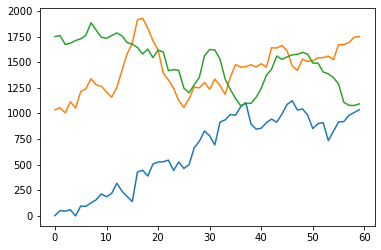

In [5]:
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

In [8]:
!mkdir DATA
import csv
str0=f"ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}"
print(str0)
fname="DATA/x_"+str0+".csv"
with open(fname, mode="w",newline='') as myfile:
    writer=csv.writer(myfile)
    for i in range (N):
        writer.writerow(x[i])
        
fname="DATA/y_"+str0+".csv"
with open(fname, mode="w") as myfile:
    writer=csv.writer(myfile)
    writer.writerows(map( lambda yy:[yy],y))

Sottodirectory o file DATA già esistente.


ts_L60_Z12_A500_DX50_bias5_N10000
